In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-whitegrid')

df = pd.read_csv('data/wine.csv')

In [49]:
df['qual_cat'] = pd.cut(df['quality'], bins = [0, 5, 6, 9],
       labels = ['low', 'medium', 'high'])

In [50]:
df['qual_cat'].value_counts()

medium    2836
low       2384
high      1277
Name: qual_cat, dtype: int64

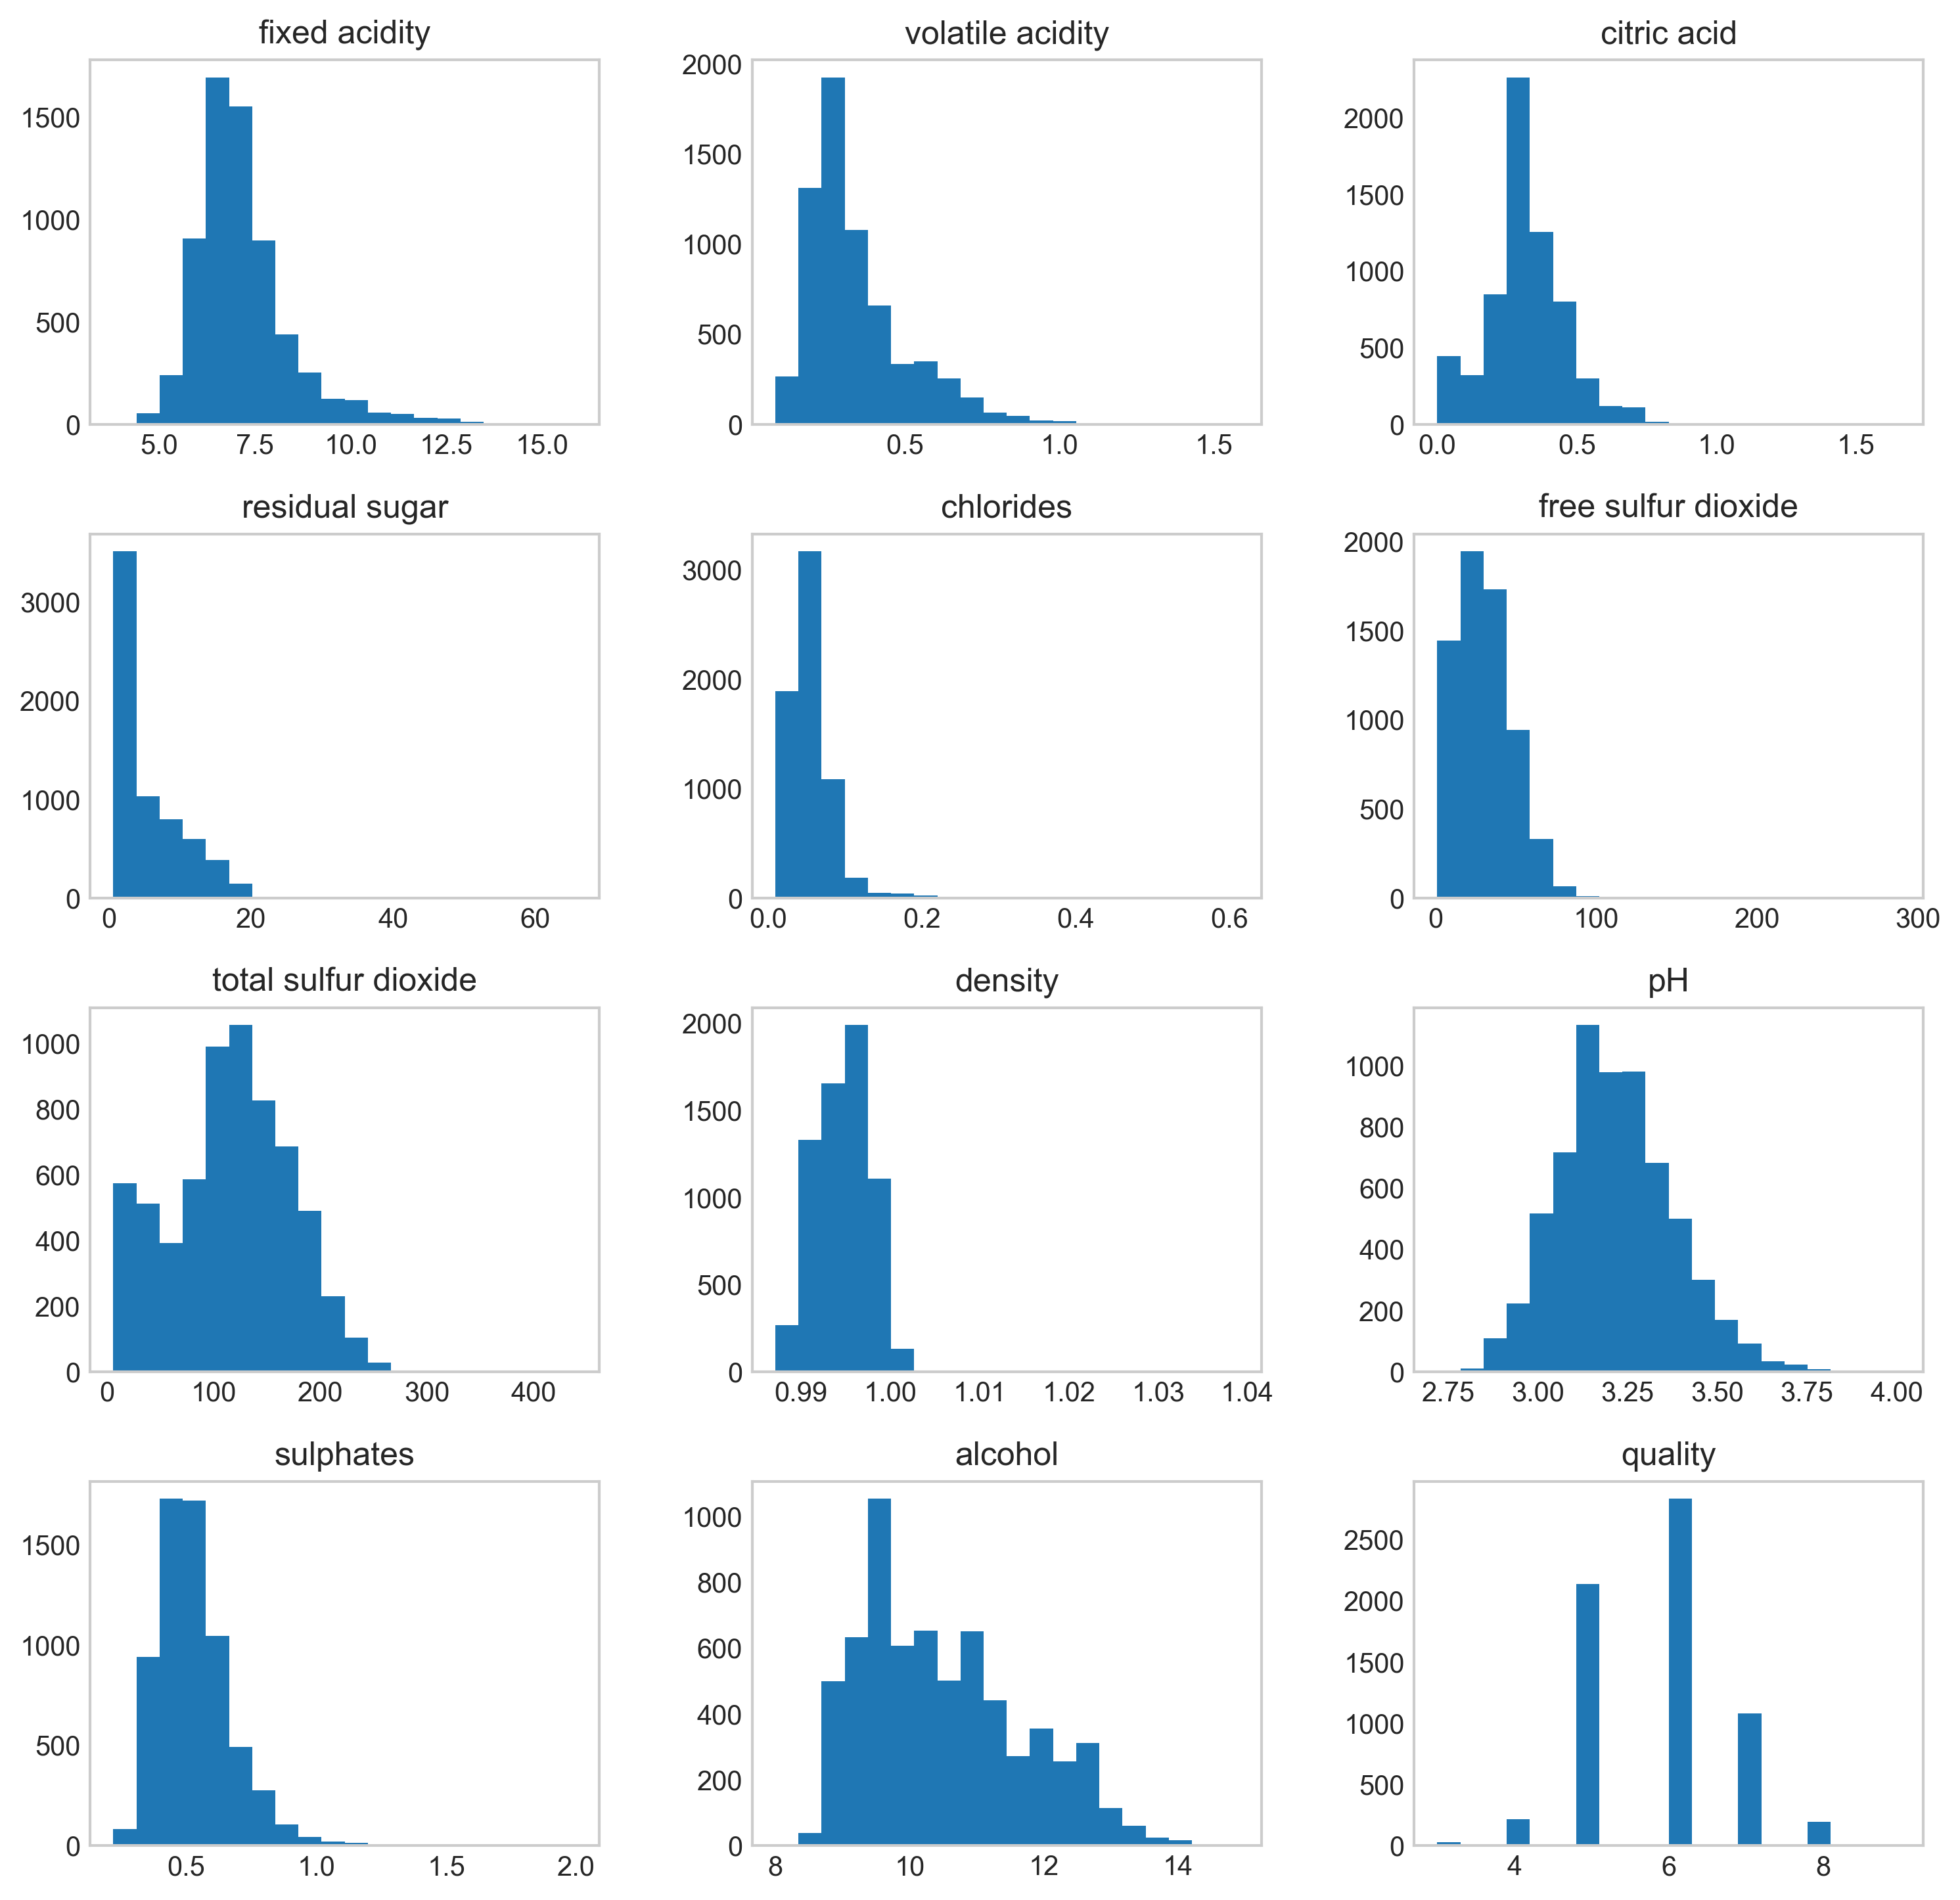

In [51]:
df.hist(figsize = (12,12), grid = False, bins = 20)

plt.show()

In [52]:
df.groupby('qual_cat').median()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
qual_cat,,,,,,,,,,,,
low,7.1,0.3375,0.295,2.9,0.052,26.0,124.0,0.99600,3.20,0.50,9.6,5.0
medium,6.9,0.2700,0.310,3.1,0.046,29.0,117.0,0.99470,3.21,0.51,10.5,6.0
high,6.9,0.2700,0.320,2.9,0.039,31.0,114.0,0.99228,3.22,0.51,11.5,7.0


In [61]:
dv = 'pH'
group = 'qual_cat'

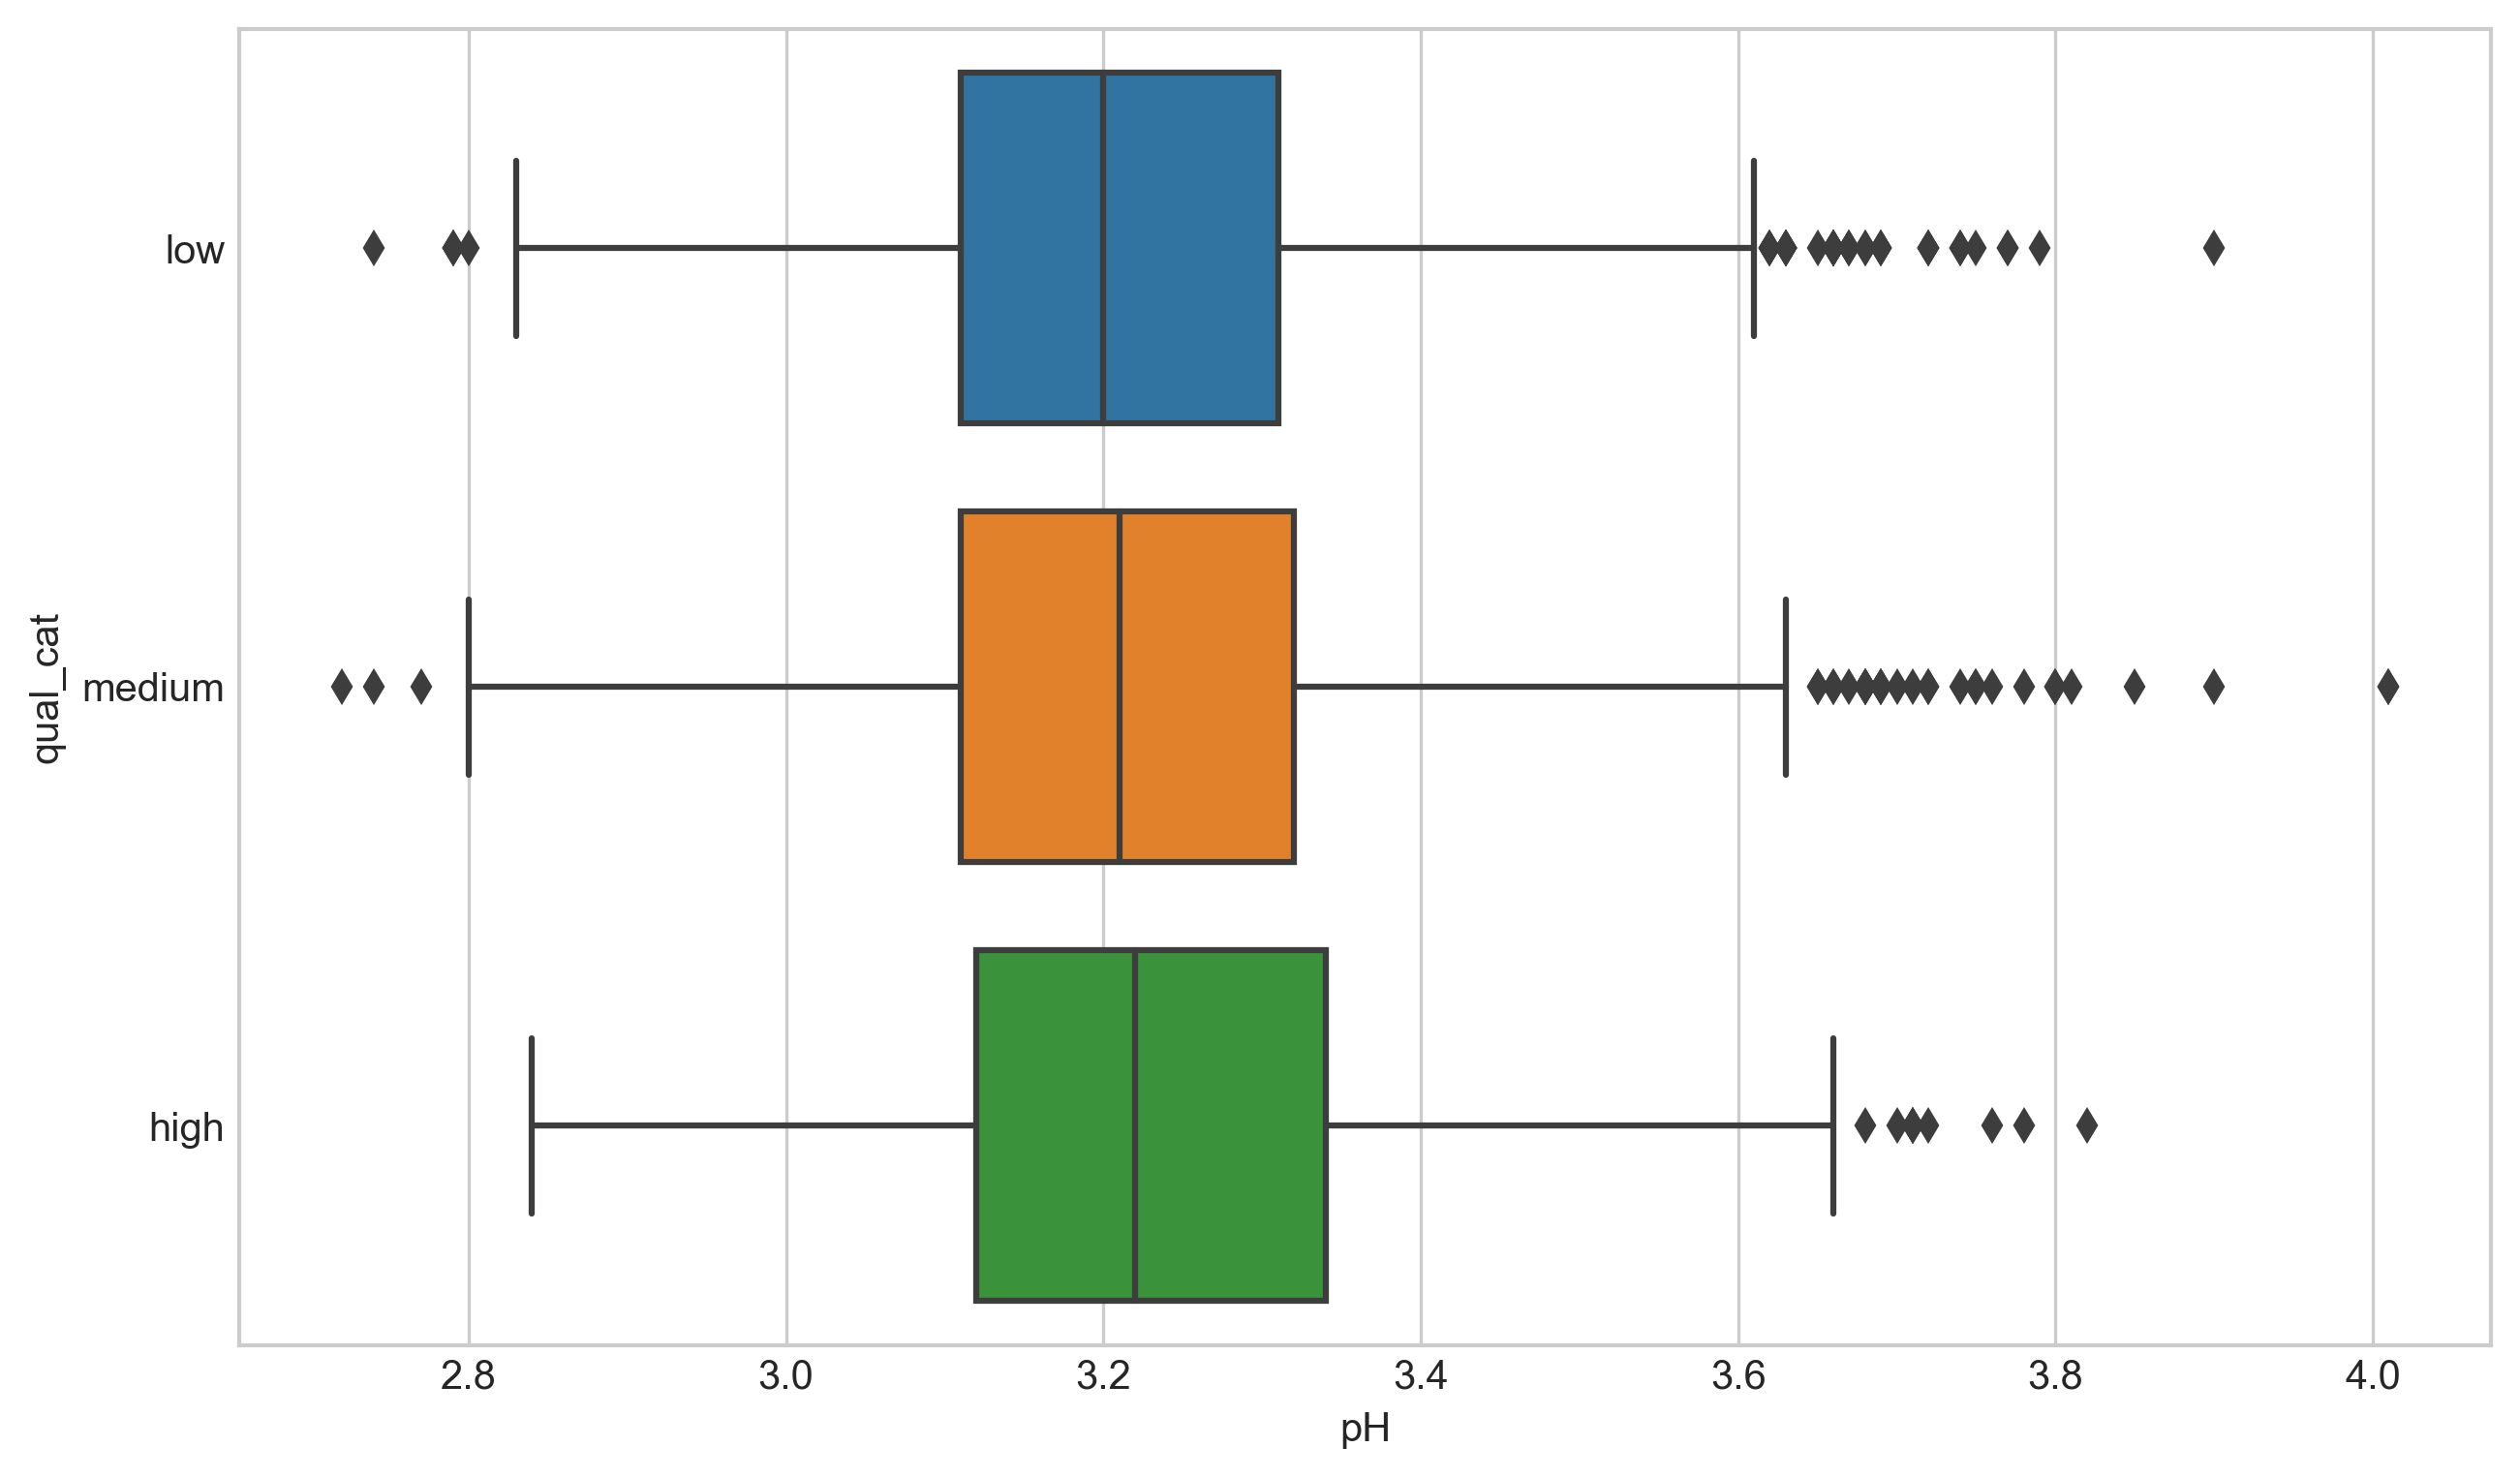

In [62]:
fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(data = df, x = dv, y = group)

plt.show()

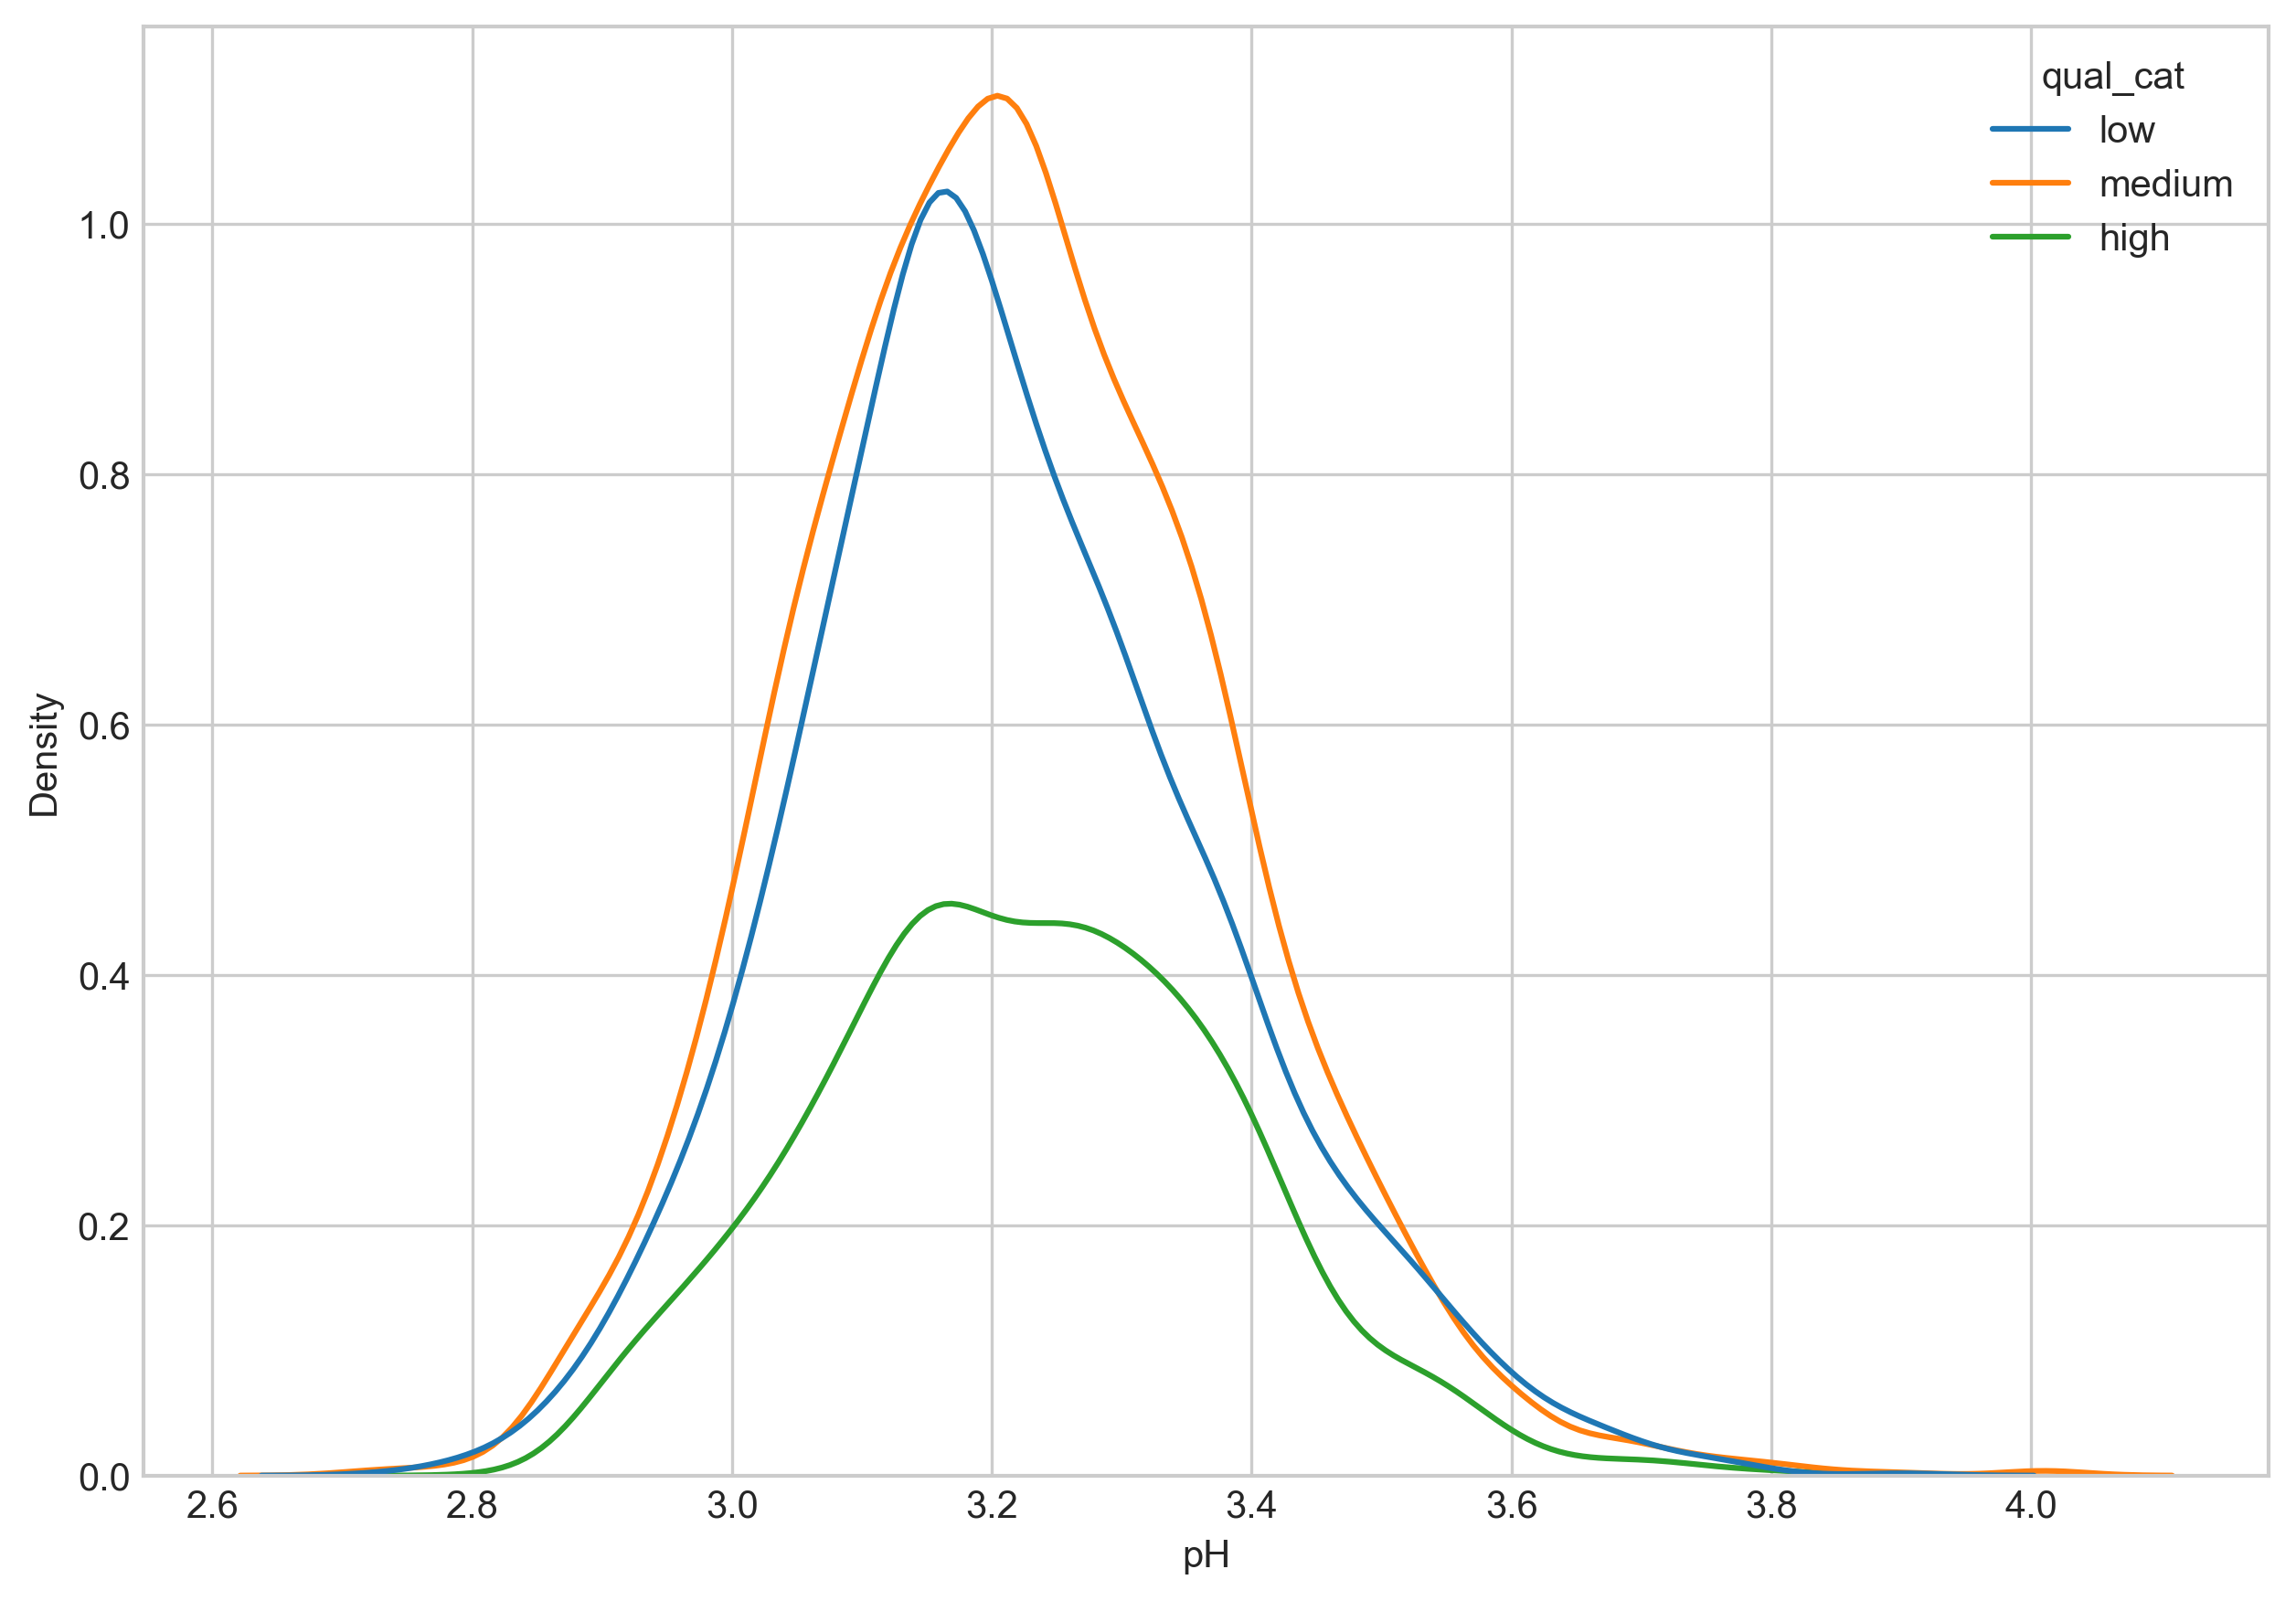

In [63]:
fig, ax = plt.subplots(figsize = (10, 7))

sns.kdeplot(data = df, x = dv, hue = group, ax = ax)

plt.show()

In [64]:
pg.normality(df, dv = dv, group = group)

,W,pval,normal
low,0.987153,7.860370e-14,False
medium,0.990874,1.821434e-12,False
high,0.992996,9.673136e-06,False


In [65]:
pg.kruskal(df, dv = dv, between = group)

,Source,ddof1,H,p-unc
Kruskal,qual_cat,2,9.082055,0.010662


In [66]:
pg.pairwise_tests(df, dv = dv, between = group, parametric = False)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,qual_cat,low,medium,False,False,3313312.5,two-sided,0.215253,-0.019879
1,qual_cat,low,high,False,False,1430977.5,two-sided,0.002763,-0.081762
2,qual_cat,medium,high,False,False,1736692.5,two-sided,0.035452,-0.061861


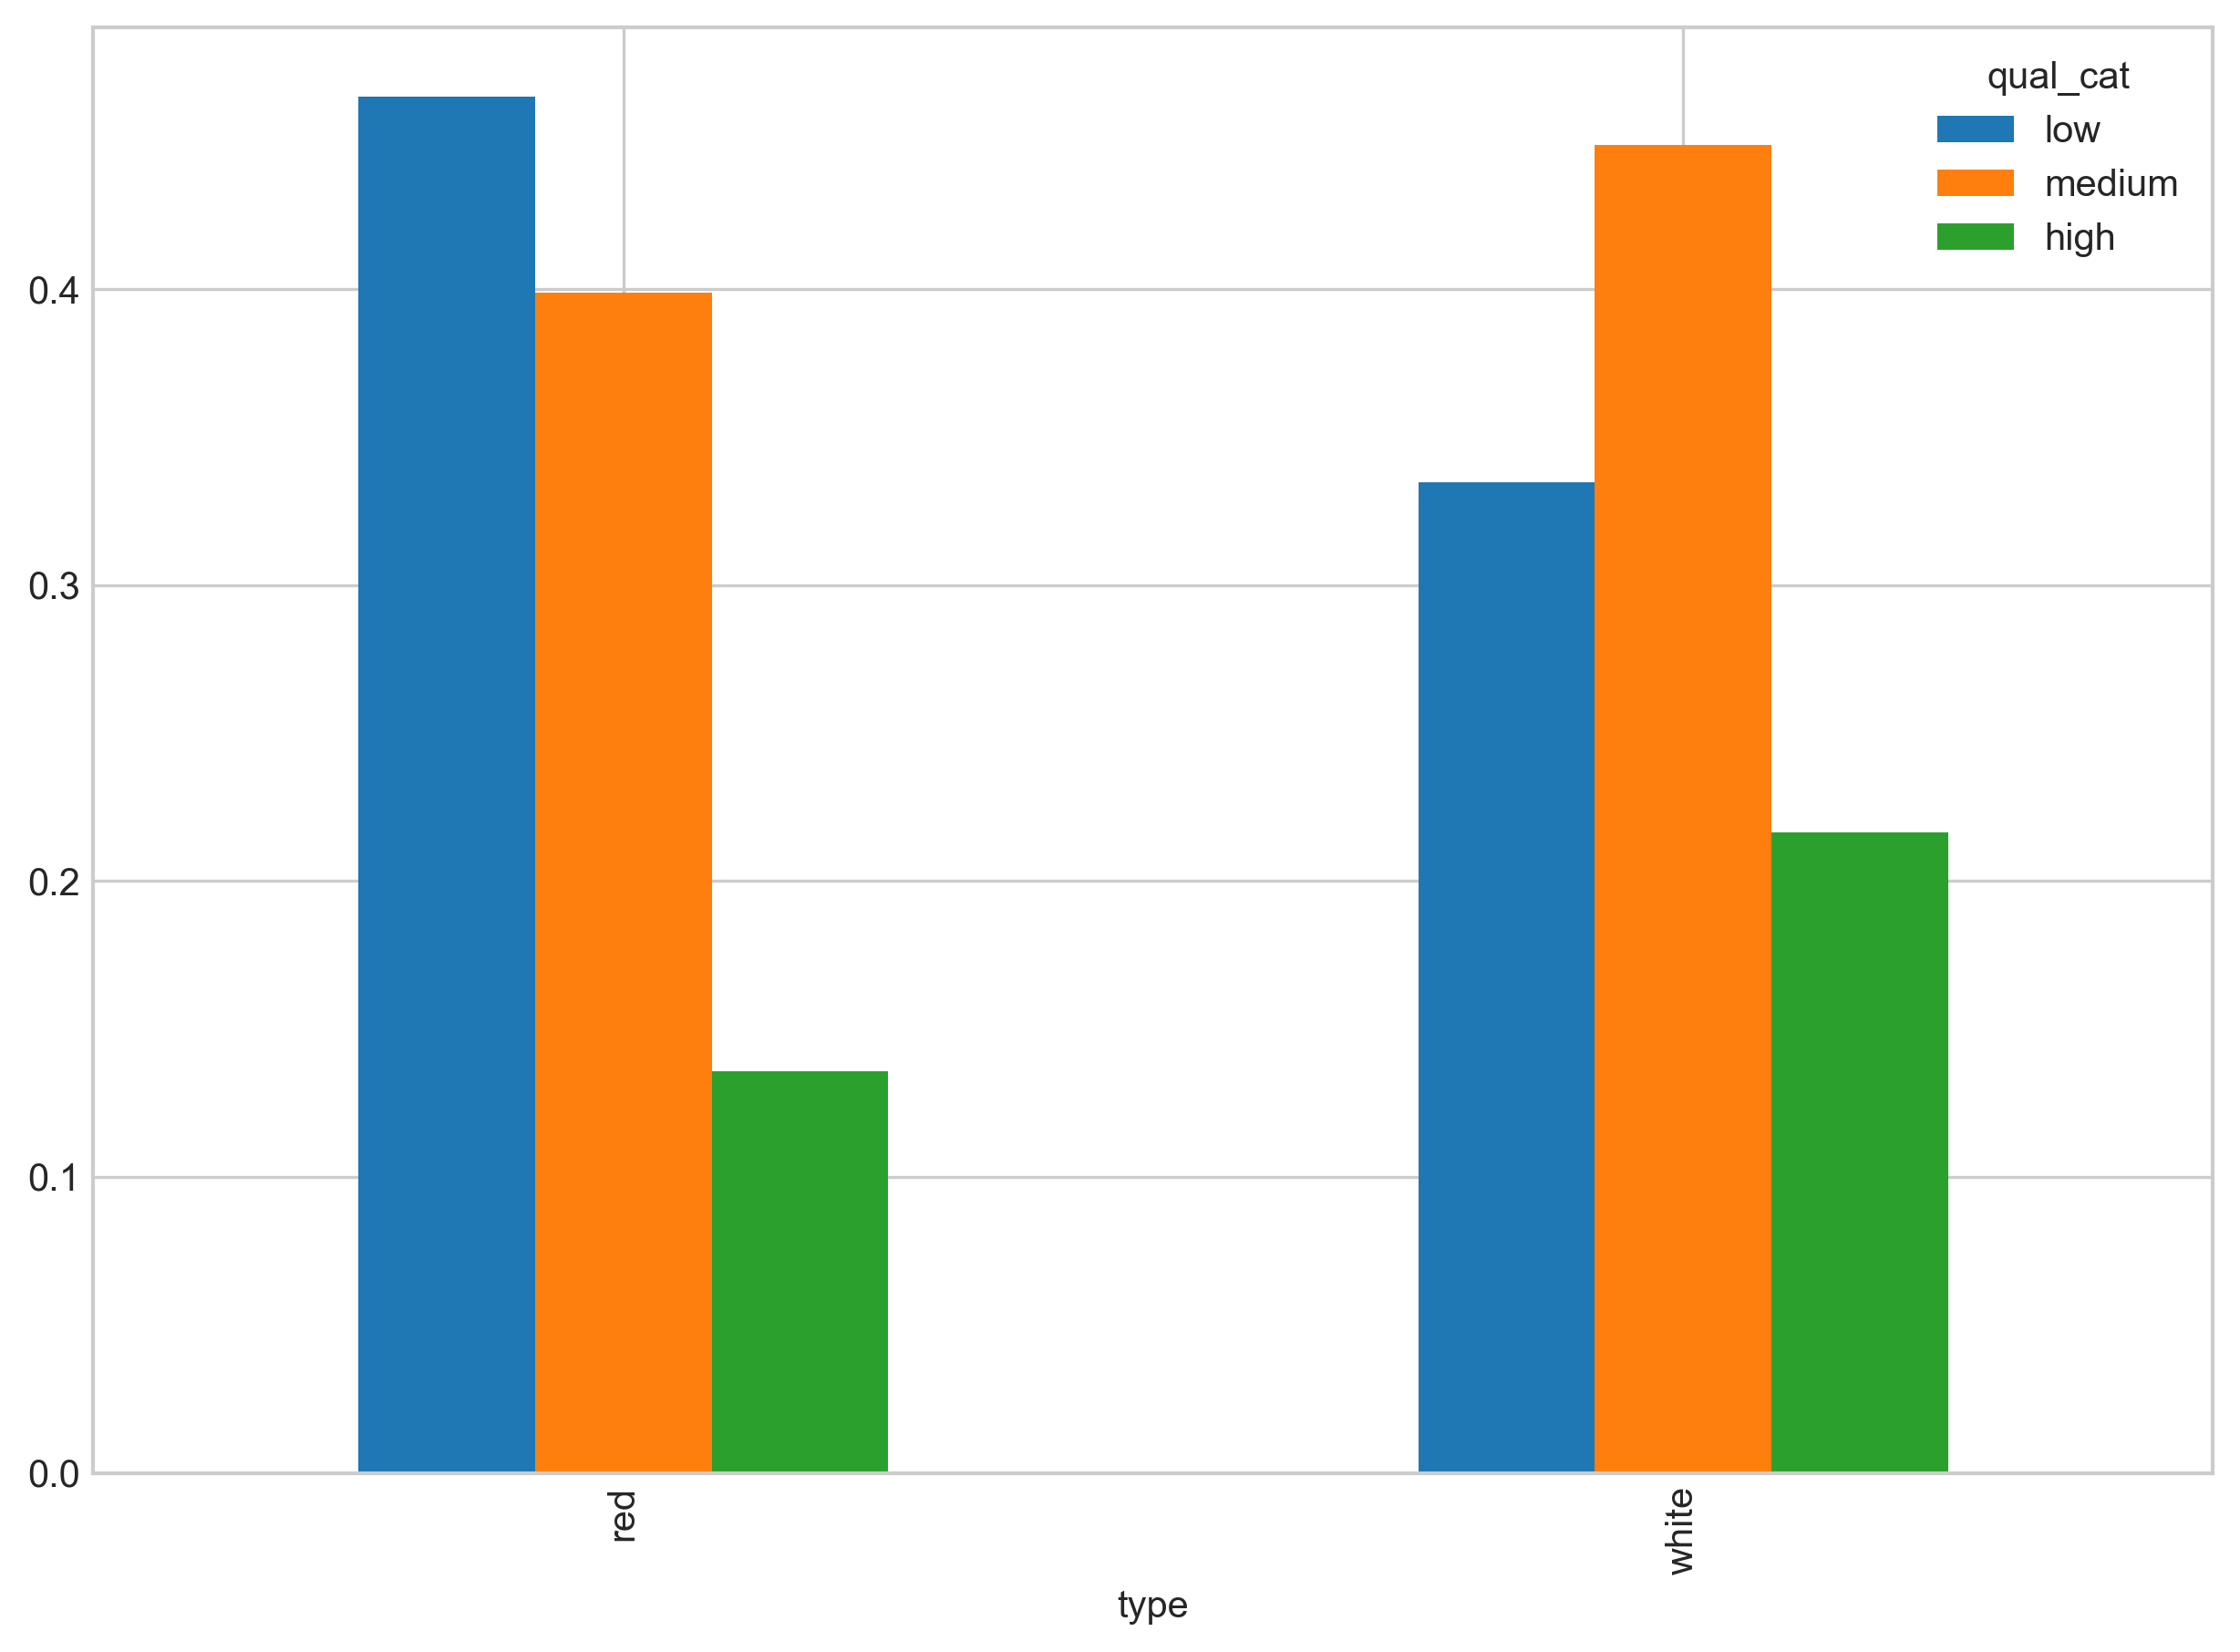

In [92]:
df_cont = pd.crosstab(df['type'], df['qual_cat'], normalize = 'index')
df_cont.plot(kind = 'bar', figsize = (10,7))

plt.show()

In [104]:
exp, obs, stats = pg.chi2_independence(df, x = 'type', y = 'qual_cat')

exp

qual_cat,low,medium,high
type,,,
red,586.734801,697.978144,314.287056
white,1797.265199,2138.021856,962.712944


In [105]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,102.696582,2.0,5.008649e-23,0.125725,1.0
1,cressie-read,0.666667,102.779043,2.0,4.806338e-23,0.125775,1.0
2,log-likelihood,0.000000,103.310926,2.0,3.683982e-23,0.126100,1.0
3,freeman-tukey,-0.500000,104.044681,2.0,2.552610e-23,0.126547,1.0
4,mod-log-likelihood,-1.000000,105.081879,2.0,1.519707e-23,0.127177,1.0
5,neyman,-2.000000,108.143762,2.0,3.287611e-24,0.129016,1.0
